In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



In [179]:
y_1day = pd.read_csv('../data/y/X1_kodex(1d).csv',index_col=0)

In [180]:
# 인덱스를 datetime 형식으로 변환
y_1day.index = pd.to_datetime(y_1day.index, format='%Y%m%d')

# 인덱스를 YYYY-MM-DD 형식의 문자열로 변환
y_1day.index = y_1day.index.strftime('%Y-%m-%d')

In [181]:
y_1day['1day_return'] = y_1day['open'] - y_1day['close']
y_1day = y_1day[['1day_return']]


In [182]:
y_0900_0910 = pd.read_csv('../data/y_rate/y_0900_0910.csv',index_col=0)
y_0900_0915 = pd.read_csv('../data/y_rate/y_0900_0915.csv',index_col=0)
y_0900_0920 = pd.read_csv('../data/y_rate/y_0900_0920.csv',index_col=0)
y_0900_0925 = pd.read_csv('../data/y_rate/y_0900_0925.csv',index_col=0)
y_0900_0930 = pd.read_csv('../data/y_rate/y_0900_0930.csv',index_col=0)
y_0900_0935 = pd.read_csv('../data/y_rate/y_0900_0935.csv',index_col=0)
y_0900_0940 = pd.read_csv('../data/y_rate/y_0900_0940.csv',index_col=0)
y_0900_0945 = pd.read_csv('../data/y_rate/y_0900_0945.csv',index_col=0)
y_0900_0950 = pd.read_csv('../data/y_rate/y_0900_0950.csv',index_col=0)
y_0900_0955 = pd.read_csv('../data/y_rate/y_0900_0955.csv',index_col=0)
y_0900_1000 = pd.read_csv('../data/y_rate/y_0900_1000.csv',index_col=0)

In [183]:
y_0900_0910

,date,y_rate
0,20181001,0.001989
1,20181002,0.000849
2,20181004,-0.004029
3,20181005,-0.001026
4,20181008,0.000687
...,...,...
1236,20231020,-0.001088
1237,20231023,-0.000784
1238,20231024,-0.001566
1239,20231025,-0.000779


In [184]:
df_list = [y_0900_0910, y_0900_0915, y_0900_0920, y_0900_0925, y_0900_0930, y_0900_0935, y_0900_0940, y_0900_0945,
        y_0900_0950, y_0900_0955, y_0900_1000]
df_list_1 = ["y_0900_0910", 'y_0900_0915', 'y_0900_0920', 'y_0900_0925', 'y_0900_0930', 'y_0900_0935', 'y_0900_0940', 'y_0900_0945',
            'y_0900_0950', 'y_0900_0955', 'y_0900_1000']

In [185]:
for i, j in enumerate(df_list):
    j[f'{i}_rate'] = j['y_rate']
    j.drop(columns=['y_rate'],inplace=True)

In [186]:
for i in df_list :
    y_0900_0910 = pd.merge(y_0900_0910, i, on='date', how='inner')

In [187]:
y = y_0900_0910

In [188]:
y['date'] = pd.to_datetime(y['date'], format='%Y%m%d')
y.set_index('date', inplace=True)

In [197]:
y_1day.index = pd.to_datetime(y_1day.index , format='%Y-%m-%d')

In [198]:
y.index

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-04', '2018-10-05',
               '2018-10-08', '2018-10-10', '2018-10-11', '2018-10-12',
               '2018-10-15', '2018-10-16',
               ...
               '2023-10-13', '2023-10-16', '2023-10-17', '2023-10-18',
               '2023-10-19', '2023-10-20', '2023-10-23', '2023-10-24',
               '2023-10-25', '2023-10-26'],
              dtype='datetime64[ns]', name='date', length=1241, freq=None)

In [199]:
result = pd.merge(y, y_1day, left_index=True, right_index=True, how='inner')

In [200]:
result

,0_rate_x,0_rate_y,1_rate,2_rate,3_rate,4_rate,5_rate,6_rate,7_rate,8_rate,9_rate,10_rate,1day_return
date,,,,,,,,,,,,,
2018-10-01,0.001989,0.001989,0.001179,0.000184,0.000000,-0.000479,-0.004126,-0.003978,-0.004457,-0.004789,-0.004641,-0.005304,49
2018-10-02,0.000849,0.000849,-0.000148,0.001182,0.000997,0.001330,0.001330,0.001994,0.002179,0.002511,0.002659,0.002179,306
2018-10-04,-0.004029,-0.004029,-0.006193,-0.005708,-0.007200,-0.007200,-0.008207,-0.008394,-0.009550,-0.009550,-0.009065,-0.009065,450
2018-10-05,-0.001026,-0.001026,-0.001710,0.000342,0.001862,0.002736,0.003230,0.003078,0.002052,0.000836,0.001178,0.001862,0
2018-10-08,0.000687,0.000687,0.000878,0.001565,0.002252,0.003283,0.002940,0.003092,0.002749,0.003779,0.004123,0.003779,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,-0.001088,-0.001088,-0.003419,-0.004662,-0.006838,-0.006061,-0.006527,-0.008236,-0.008702,-0.009324,-0.010567,-0.009324,235
2023-10-23,-0.000784,-0.000784,0.000627,0.002351,-0.001254,-0.001881,-0.001881,0.000157,0.001724,0.000000,0.000157,0.000784,135
2023-10-24,-0.001566,-0.001566,-0.002193,-0.001880,-0.004699,-0.003446,-0.003603,-0.003603,-0.004856,-0.005169,-0.006109,-0.005482,-95


In [201]:
result.drop(columns='0_rate_y',inplace=True)

In [205]:
result.columns = ['y_0910','y_0915', "y_0920",'y_0925','y_0930','y_0935','y_0940','y_0945','y_0950','y_0955','y_1000','y_1day']


In [206]:
print(y.corr(method='pearson'))

          0_rate_x  0_rate_y    1_rate    2_rate    3_rate    4_rate  \
0_rate_x  1.000000  1.000000  0.792958  0.735385  0.650741  0.624235   
0_rate_y  1.000000  1.000000  0.792958  0.735385  0.650741  0.624235   
1_rate    0.792958  0.792958  1.000000  0.904846  0.813986  0.773812   
2_rate    0.735385  0.735385  0.904846  1.000000  0.916620  0.863248   
3_rate    0.650741  0.650741  0.813986  0.916620  1.000000  0.935025   
4_rate    0.624235  0.624235  0.773812  0.863248  0.935025  1.000000   
5_rate    0.589584  0.589584  0.738307  0.821022  0.897075  0.952554   
6_rate    0.552744  0.552744  0.694403  0.776894  0.843551  0.901745   
7_rate    0.538234  0.538234  0.677742  0.758588  0.817190  0.869222   
8_rate    0.521052  0.521052  0.678124  0.745558  0.795379  0.843824   
9_rate    0.522327  0.522327  0.659483  0.724416  0.770720  0.818721   
10_rate   0.508398  0.508398  0.642520  0.708123  0.757292  0.803067   

            5_rate    6_rate    7_rate    8_rate    9_rate   10

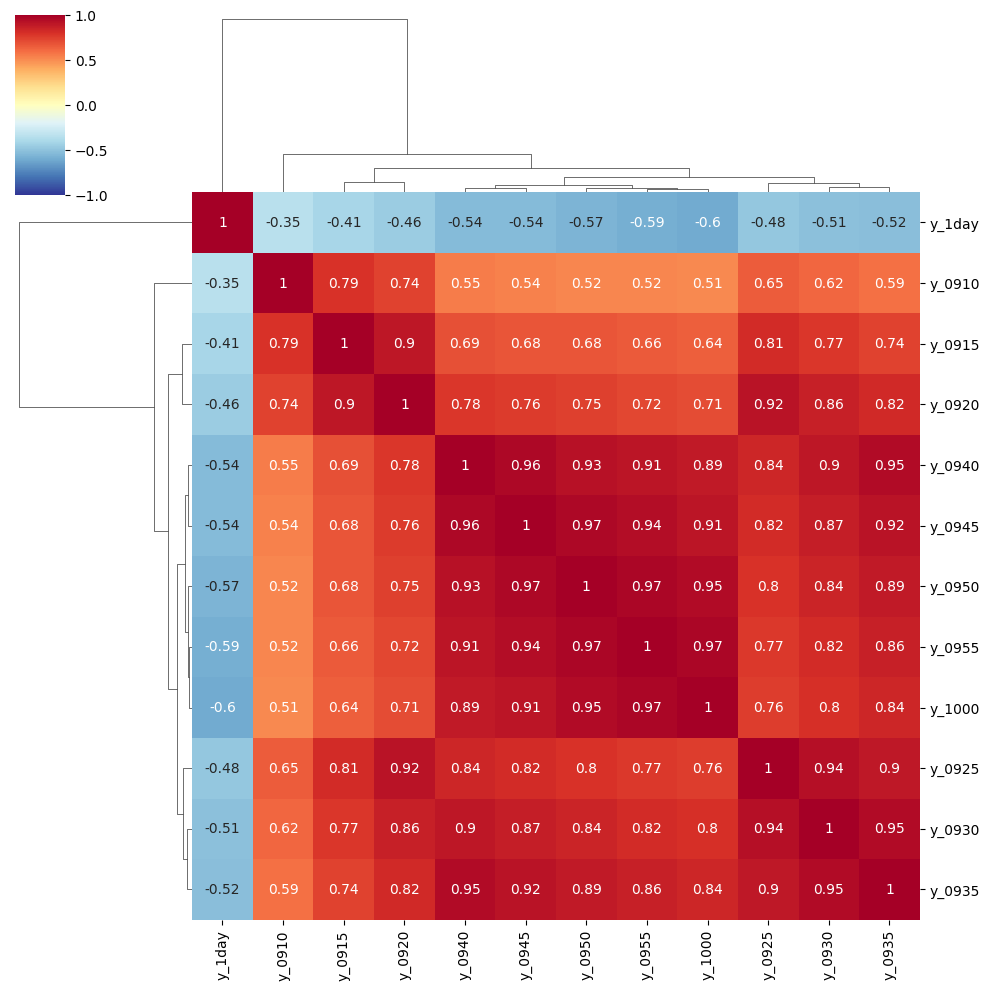

In [207]:
df = result.corr()

sns.clustermap(df, 
            annot = True,      # 실제 값 화면에 나타내기
            cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            )